In [1]:
# imports
import pandas as pd
from Simulation_Class import simulation
from Survival_prob_Class import survival_prob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# initialize simulation 
sim = simulation()

In [3]:
# initialize survival_prob
survival = survival_prob()

In [4]:
# import dataset of real real interventions 
# contains patient location, time for vector to get there 
df_interventions = pd.read_csv('Data/interventions.csv')

In [5]:
# display df 
df_interventions

,T1,T3,Latitude intervention,Longitude intervention,Response Time
0,2022-06-07 07:02:17,2022-06-07 07:11:24,50.861866,4.708210,547.0
1,2022-06-08 13:26:34,2022-06-08 13:35:03,50.873174,4.716699,509.0
2,2022-06-08 14:35:19,2022-06-08 14:47:58,50.928140,4.703247,759.0
3,2022-06-09 09:51:23,2022-06-09 10:03:05,50.874550,4.730246,702.0
4,2022-06-13 12:35:22,2022-06-13 12:44:12,50.879098,4.696672,530.0
...,...,...,...,...,...
76,2023-04-27 09:45:18,2023-04-27 09:54:43,50.856571,4.653801,565.0
77,2023-05-02 18:36:37,2023-05-02 18:45:01,50.858510,4.693520,504.0
78,2023-05-03 17:38:46,2023-05-03 17:46:05,50.861650,4.681370,439.0
79,2023-05-13 11:26:53,2023-05-13 11:50:12,50.885531,4.684591,1399.0


In [6]:
# save the patient locations in a dataframe 
# save longitude and latitude of patient to tuple 
patient_longitudes = df_interventions['Longitude intervention'].values
patient_latitudes = df_interventions['Latitude intervention'].values

# zip to one tuple 
patient = list(zip(patient_longitudes, patient_latitudes))

In [7]:
# display pateint
print(patient)

[(4.70821, 50.861866), (4.716699, 50.873174), (4.703247, 50.92814), (4.730246, 50.87455), (4.696672, 50.879098), (4.705947, 50.886687), (4.690584, 50.89003), (4.692755, 50.865466), (4.700683, 50.87929), (4.681497, 50.854151), (4.698357, 50.880213), (4.684785, 50.879319), (4.700753, 50.887833), (4.699796, 50.87634), (4.700977, 50.883089), (4.695717, 50.855068), (4.67431, 50.877462), (4.698691, 50.865606), (4.688853, 50.879023), (4.694036, 50.8606), (4.736733, 50.862799), (4.733566, 50.898585), (4.738449, 50.901604), (4.698003, 50.868334), (4.712916, 50.869559), (4.693243, 50.885472), (4.734176, 50.878237), (4.715765, 50.877798), (4.700611, 50.877705), (4.712741, 50.876974), (4.700399, 50.923948), (4.71539, 50.88122), (4.71745, 50.874271), (4.69952, 50.866911), (4.711828, 50.871651), (4.730961, 50.850728), (4.663558, 50.876016), (4.735979, 50.888449), (4.728948, 50.868191), (4.698691, 50.865606), (4.674596, 50.871597), (4.735139, 50.879159), (4.70586, 50.881605), (4.702134, 50.897263), (

In [8]:
# import dataset with the locations of the AEDs 
df_aed = pd.read_csv('Data/filtered_AED_loc.csv')

In [9]:
# save longitude and latitude of AED to tuple 
AED_longitudes = df_aed['longitude'].values
AED_latitudes = df_aed['latitude'].values

# zip to one tuple 
AED = list(zip(AED_longitudes, AED_latitudes))

In [10]:
# transform aed to dataframe with headings
AED = pd.DataFrame(AED, columns=['longitude', 'latitude'])

In [11]:
# display aed
AED

,longitude,latitude
0,4.737563,50.847642
1,4.696771,50.882662
2,4.705893,50.891915
3,4.718684,50.893646
4,4.693191,50.869499
...,...,...
134,4.676583,50.865563
135,4.676583,50.865563
136,4.711970,50.868075
137,4.748855,50.870141


In [12]:
# import data for first responder locations 
# Load the CSV file into a DataFrame
FR_05 = pd.read_csv('0.5%_FRs.csv')
FR_1 = pd.read_csv('1%_FRs.csv')

In [13]:
FR_05

,x,y
0,4.700665,50.878356
1,4.700855,50.878922
2,4.700938,50.878428
3,4.702417,50.878322
4,4.698315,50.881002
...,...,...
511,4.690463,50.933269
512,4.692093,50.931006
513,4.677287,50.932955
514,4.694451,50.935168


In [14]:
# Combine 'longitude' and 'latitude' into a list of tuples
coordinates = list(zip(AED['longitude'], AED['latitude']))
# Create the dictionary
AED = {'coordinates': coordinates}

print("Transformed dictionary:")
print(AED)

Transformed dictionary:
{'coordinates': [(4.737563, 50.8476423), (4.6967705, 50.8826624), (4.7058934, 50.89191539999999), (4.7186837, 50.8936461), (4.6931907, 50.869499), (4.7017286, 50.8743307), (4.7127525, 50.8670637), (4.682384799999999, 50.8778935), (4.6964705, 50.8713027), (4.7127446, 50.867102), (4.7168358, 50.8769717), (4.701441099999999, 50.88228909999999), (4.7062523, 50.8958652), (4.7156895, 50.8813682), (4.7330828, 50.85112360000001), (4.734445700000001, 50.8823756), (4.724020299999999, 50.9281215), (4.6916883, 50.8705595), (4.7458358, 50.8644573), (4.6958563, 50.8470644), (4.7116128, 50.867677), (4.7515505, 50.8883109), (4.680962699999999, 50.8839064), (4.7106457, 50.8858827), (4.7146301, 50.8841416), (4.712077799999999, 50.8786396), (4.7152536, 50.874393), (4.7075612, 50.8933532), (4.7031832, 50.8816687), (4.7130637, 50.9108976), (4.7022043, 50.90354660000001), (4.7313633, 50.8845695), (4.743396499999999, 50.8674498), (4.704471000000001, 50.8560364), (4.7063333, 50.9258594

In [15]:
# responders to right format 
# Convert the 'x' and 'y' columns into a list of tuples
coordinates_05 = [(row['x'], row['y']) for _, row in FR_05.iterrows()]
coordinates_1 = [(row['x'], row['y']) for _, row in FR_1.iterrows()]
# Create the responders dictionary with the coordinates
responders_05 = {'coordinates': coordinates_05}
responders_1 = {'coordinates': coordinates_1}

In [115]:
# make loop for all patients for one FR percentage, this is for 0.5%
# will not loop over several FR percentages, takes to long with the APIs 
# don't really care about the vectors, alreasy have that 

# Initialize an empty list to store individual df_time DataFrames
all_times = []

i = 0 # index 

for p in patient[:26]: 
    # used for testing 
    if i == 21: # do for 20 first ones now since it takes soooo long 
        break  # Exit the loop if i equals 2
    # patient to right format 
    Patient = {
    'longitude': p[0],
    'latitude': p[1]
    }
    Patient = pd.DataFrame([Patient])
    Patient = Patient.transpose()

    # simulate the repsonse time 
    df_time = sim.fastest_fcr_aed(Patient, responders_05, AED, 1)

    # Append df_time to the list
    all_times.append(df_time)

    # update index
    i+=1

Duration for responders found
You did a lot take a 30 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Time to sleep even longer otherwise the API gets tired.
Duration for responders found
You did a lot take a 30 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Time to sleep even longer otherwise the API gets tired.
Duration for responders found
You did a lot take a 30 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Time to sleep even longer otherwise the API gets tired.
Duration for responders found
You did a lot take a 30 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Time to sleep even longer otherwise the API gets tired.
Duration for responders found
You did a lot take a 30 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Time to sleep even longer otherwise the API gets tired.
Duration for responders found
You d

In [116]:
all_times

[   Responder_lon  Responder_lat  duration_Responder   AED_lon   AED_lat  \
 1       4.737627      50.862276                66.9  4.740303  50.86247   
 
    duration_AED  
 1        1419.4  ,
    Responder_lon  Responder_lat  duration_Responder   AED_lon    AED_lat  \
 1       4.734037      50.897935                73.2  4.733118  50.891946   
 
    duration_AED  
 1         684.0  ,
    Responder_lon  Responder_lat  duration_Responder   AED_lon    AED_lat  \
 1       4.735552      50.899763               319.6  4.734868  50.892516   
 
    duration_AED  
 1        1132.7  ,
    Responder_lon  Responder_lat  duration_Responder   AED_lon    AED_lat  \
 1       4.696955      50.867519                83.2  4.697286  50.870961   
 
    duration_AED  
 1         460.1  ,
    Responder_lon  Responder_lat  duration_Responder   AED_lon    AED_lat  \
 1       4.713377       50.87123               130.4  4.707391  50.869384   
 
    duration_AED  
 1         421.8  ,
    Responder_lon  Responde

In [117]:
# make one big dataframe of the times
df_fr_05 = pd.concat(all_times, ignore_index=True)

In [118]:
df_fr_05 # took 17 min to get 2 :((

,Responder_lon,Responder_lat,duration_Responder,AED_lon,AED_lat,duration_AED
0,4.737627,50.862276,66.9,4.740303,50.862470,1419.4
1,4.734037,50.897935,73.2,4.733118,50.891946,684.0
2,4.735552,50.899763,319.6,4.734868,50.892516,1132.7
3,4.696955,50.867519,83.2,4.697286,50.870961,460.1
4,4.713377,50.871230,130.4,4.707391,50.869384,421.8
5,4.693725,50.885385,70.3,4.694289,50.882995,516.7
6,4.734171,50.878541,20.6,4.734831,50.881973,442.0
7,4.715932,50.877156,70.9,4.716836,50.876972,506.5


In [ ]:
# do this for more pateints and for other FR percentages

In [119]:
# columns to drop
columns_to_drop = ['Responder_lon', 'Responder_lat', 'AED_lon', 'AED_lat']  

In [120]:
# make a dataframe with the times for repsponder, aed and vector 
df_fr_05.drop(columns=columns_to_drop, inplace=True)

In [121]:
print(df_fr_05)

   duration_Responder  duration_AED
0                66.9        1419.4
1                73.2         684.0
2               319.6        1132.7
3                83.2         460.1
4               130.4         421.8
5                70.3         516.7
6                20.6         442.0
7                70.9         506.5


In [ ]:
# add the vector time 
# Collect the first 5 rows of the "Response Time" column
vector_times = df_interventions.iloc[:len(df_fr_05), df_interventions.columns.get_loc('Response Time')]
df_fr_05['duration_vector'] = vector_times

In [124]:
df_fr_05

,duration_Responder,duration_AED,duration_vector
0,66.9,1419.4,NaN
1,73.2,684.0,NaN
2,319.6,1132.7,NaN
3,83.2,460.1,NaN
4,130.4,421.8,NaN
5,70.3,516.7,NaN
6,20.6,442.0,NaN
7,70.9,506.5,NaN


In [29]:
# save df now so i can use later
df_fr_05.to_csv('Data/05_sim.csv', index=False)

In [ ]:
# make loop for all patients for one FR percentage, this is for 1.0 %
# will not loop over several FR percentages, takes to long with the APIs 
# don't really care about the vectors, alreasy have that 

# Initialize an empty list to store individual df_time DataFrames
all_times_1 = []

i = 0 # index 

for p in patient[17:]: 
    # used for testing 
    if i == 21: # do for 20 first ones now since it takes soooo long 
        break  # Exit the loop if i equals 2
    # patient to right format 
    Patient = {
    'longitude': p[0],
    'latitude': p[1]
    }
    Patient = pd.DataFrame([Patient])
    Patient = Patient.transpose()

    # simulate the repsonse time 
    df_time = sim.fastest_fcr_aed(Patient, responders_1, AED, 1)

    # Append df_time to the list
    all_times_1.append(df_time)

    # update index
    i+=1

In [106]:
# make one big dataframe of the times
df_fr_1 = pd.concat(all_times_1, ignore_index=True)

In [107]:
df_fr_1

,Responder_lon,Responder_lat,duration_Responder,AED_lon,AED_lat,duration_AED
0,4.697731,50.866092,14.4,4.696955,50.866943,843.2
1,4.688687,50.879609,69.9,4.686606,50.878403,934.6
2,4.694644,50.860305,41.7,4.692294,50.863067,1375.2
3,4.736850,50.863480,108.5,4.739912,50.864390,1084.3
4,4.732766,50.897598,116.0,4.733350,50.894691,860.0
5,4.735387,50.900942,185.7,4.735196,50.895391,1362.9
6,4.697633,50.868423,21.8,4.695930,50.869899,592.2
7,4.713199,50.870747,104.7,4.711276,50.868442,207.1
8,4.692676,50.884715,76.8,4.694492,50.883382,528.2
9,4.733865,50.878733,25.6,4.732424,50.880887,635.8


In [ ]:
# make a dataframe with the times for repsponder, aed and vector 
df_fr_1.drop(columns=columns_to_drop, inplace=True)

In [113]:
# add the vector time 
# Collect the first 5 rows of the "Response Time" column
vector_times = df_interventions.iloc[17:28, df_interventions.columns.get_loc('Response Time')]
df_fr_1['duration_vector'] = vector_times

In [114]:
vector_times

17     478.0
18    1297.0
19     545.0
20    2010.0
21     788.0
22     677.0
23     512.0
24     367.0
25     347.0
26     703.0
27    1043.0
Name: Response Time, dtype: float64

In [112]:
df_fr_1

,duration_Responder,duration_AED,duration_vector
0,14.4,843.2,NaN
1,69.9,934.6,NaN
2,41.7,1375.2,NaN
3,108.5,1084.3,NaN
4,116.0,860.0,NaN
5,185.7,1362.9,NaN
6,21.8,592.2,NaN
7,104.7,207.1,NaN
8,76.8,528.2,NaN
9,25.6,635.8,NaN


In [54]:
# save df now so i can use later
df_fr_1.to_csv('Data/1_sim.csv', index=False)

### Load the datasets that were obtained above, no need to run simulations again 

In [23]:
# load datasets
df_05 = pd.read_csv('Data/05_sim.csv')
df_1 = pd.read_csv('Data/1_sim.csv')

In [24]:
# estimate probability of survival 0.5

# save probabilites in df
df_prob_05 = pd.DataFrame(columns=['prob_resp', 'prob_vec'])

# loop through df 
for index, row in df_05.iterrows():
    prob_resp, prob_vec = survival.probability_survival(row['duration_Responder'], row['duration_AED'], row['duration_vector'])
    # add calcualted probabilities to df 
    df_prob_05.loc[index] = {'prob_resp': prob_resp, 'prob_vec': prob_vec}

In [25]:
# estimate probability of survival 

# save probabilites in df
df_prob_1 = pd.DataFrame(columns=['prob_resp', 'prob_vec'])

# loop through df 
for index, row in df_1.iterrows():
    prob_resp, prob_vec = survival.probability_survival(row['duration_Responder'], row['duration_AED'], row['duration_vector'])
    # add calcualted probabilities to df 
    df_prob_1.loc[index] = {'prob_resp': prob_resp, 'prob_vec': prob_vec}

### Make some plots 

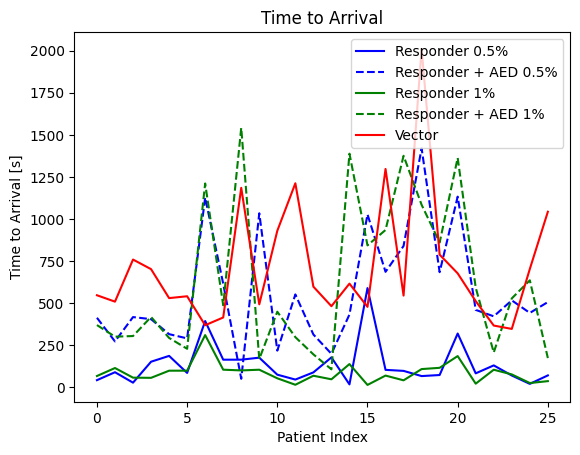

In [28]:
# plot the arrival time of fcr, aed and vector, for 0.5% and 1%
plt.plot(df_fr_05.index, df_fr_05['duration_Responder'], label='Responder 0.5%', c='blue')
plt.plot(df_fr_05.index, df_fr_05['duration_AED'], label='Responder + AED 0.5%', c='blue', linestyle='dashed')
plt.plot(df_fr_1.index, df_fr_1['duration_Responder'], label='Responder 1%', c='green')
plt.plot(df_fr_1.index, df_fr_1['duration_AED'], label='Responder + AED 1%', c='green', linestyle='dashed')
plt.plot(df_fr_05.index, df_fr_05['duration_vector'], label='Vector', c='red')

plt.xlabel('Patient Index')
plt.ylabel('Time to Arrival [s]')
plt.title('Time to Arrival')
plt.legend()
plt.show()

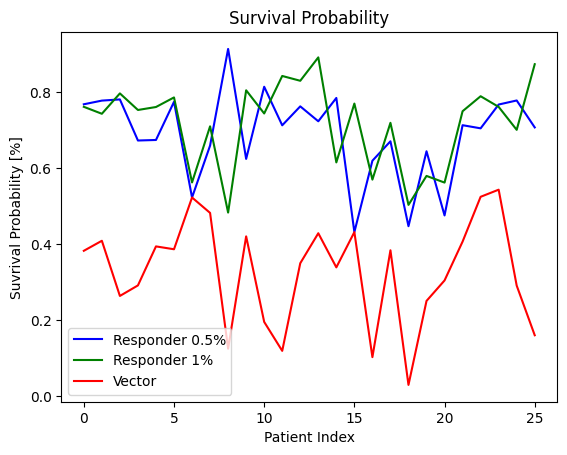

In [29]:
# plot the survival probability of fcr and vector 
# plot the arrival time of fcr, aed and vector 
# plt.figure(figsize=(10, 6))
plt.plot(df_prob_05.index, df_prob_05['prob_resp'], label='Responder 0.5%', c='blue')
plt.plot(df_prob_1.index, df_prob_1['prob_resp'], label='Responder 1%', c='green')
plt.plot(df_prob_05.index, df_prob_05['prob_vec'], label='Vector', c='red')

plt.xlabel('Patient Index')
plt.ylabel('Suvrival Probability [%]')
plt.title('Survival Probability')
plt.legend()
plt.show()

In [30]:
# calculate the mean survival probability 
print('Mean survival probability FCR 0.5%:')
print(np.mean(df_prob_05['prob_resp']))
print('Mean survival probability FCR 1.0%:')
print(np.mean(df_prob_1['prob_resp']))
print('Mean survival probability vector:')
print(np.mean(df_prob_05['prob_vec']))

Mean survival probability FCR 0.5%:
0.6899768070651332
Mean survival probability FCR 1.0%:
0.7183830444909206
Mean survival probability vector:
0.32851309500367726
